In [1]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')



In [2]:
np.random.seed(1234)
import pymc3 as pymc3
import pymc as pymc2
import scipy.stats as stats

In [3]:
import logging
_logger = logging.getLogger("theano.gof.compilelock")
_logger.setLevel(logging.ERROR)

Applied interval-transform to sigma and added transformed sigma_interval to model.
 [-----------------100%-----------------] 1000 of 1000 complete in 2.5 sec

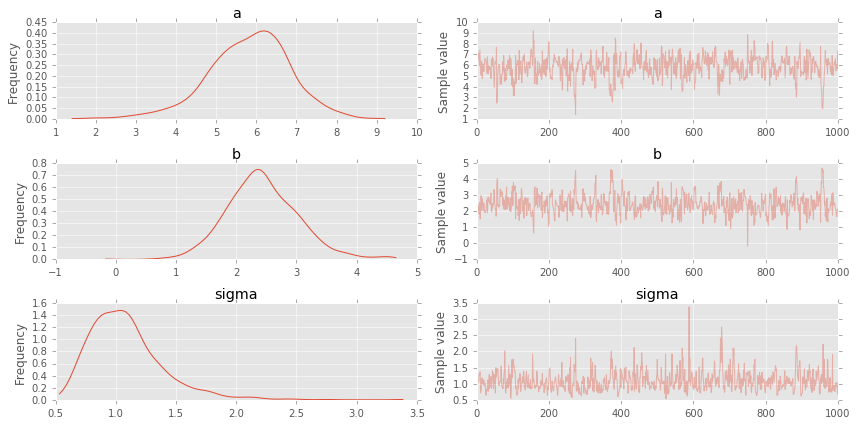

In [10]:
# observed data
n = 11
_a = 6
_b = 2
x = np.linspace(0, 1, n)
y = _a*x + _b + np.random.randn(n)
niter = 1000

with pymc3.Model() as model:
    a = pymc3.Normal('a', mu=0, sd=20)
    b = pymc3.Normal('b', mu=0, sd=20)
    sigma = pymc3.Uniform('sigma', lower=0, upper=20)

    y_est = a*x + b # simple auxiliary variables

    likelihood = pymc3.Normal('y', mu=y_est, sd=sigma, observed=y)
    # inference
    start = pymc3.find_MAP()
    step = pymc3.NUTS() # Hamiltonian MCMC with No U-Turn Sampler
    trace = pymc3.sample(niter, step, start, random_seed=123, progressbar=True)
    pymc3.traceplot(trace);

In [ ]:
pymc3.MvNormal()

In [5]:
a = pymc2.Normal('slope', mu=0, tau=1.0/10**2)

In [4]:
# observed data
n = 11
_a = 6
_b = 2
x = np.linspace(0, 1, n)
y = _a*x + _b + np.random.randn(n)

data = pd.DataFrame(np.array([x, y]).T, columns=['x', 'y'])
#niter = 1000

# define priors
a = pymc2.Normal('slope', mu=0, tau=1.0/10**2)
b = pymc2.Normal('intercept', mu=0, tau=1.0/10**2)
tau = pymc2.Gamma("tau", alpha=0.1, beta=0.1)

# define likelihood
@pymc2.deterministic
def mu(a=a, b=b):
    return a*x + b

ylik = pymc2.Normal('y', mu=mu, tau=tau, value=y, observed=True)

# inference
m = pymc2.Model([a, b, tau, ylik])
mc = pymc2.MCMC(m)
mc.sample(iter=11000, burn=10000)


 [-----------------100%-----------------] 11000 of 11000 complete in 2.6 sec

In [11]:
eval('test'+str(0)) = 1

SyntaxError: can't assign to function call (<ipython-input-11-2accade7fdef>, line 1)

In [5]:
a.stats()

{'95% HPD interval': array([ 3.9842,  9.0485]),
 'mc error': 0.1224,
 'mean': 6.1807,
 'n': 1000,
 'quantiles': {2.5000: 3.9478,
  25: 5.2205,
  50: 6.0155,
  75: 7.1913,
  97.5000: 9.0132},
 'standard deviation': 1.3567}

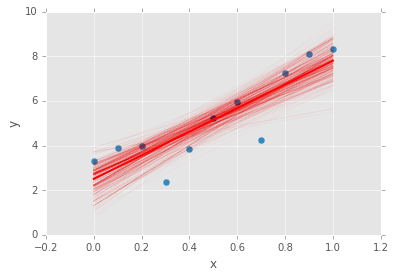

In [10]:
abar = a.stats()['mean']
bbar = b.stats()['mean']
data.plot(x='x', y='y', kind='scatter', s=50);
xp = np.array([x.min(), x.max()])
plt.plot(a.trace()*xp[:, None] + b.trace(), c='red', alpha=0.01)
plt.plot(xp, abar*xp + bbar, linewidth=2, c='red');

Plotting slope
Plotting tau
Plotting intercept


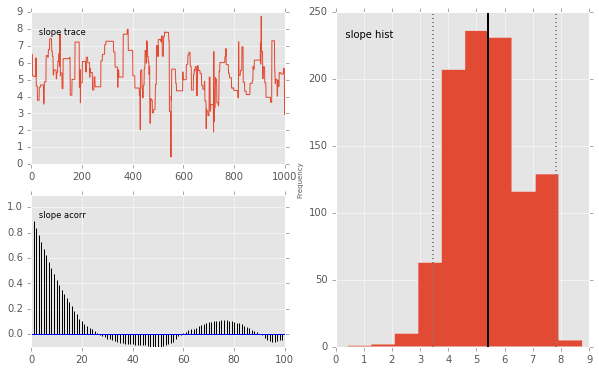

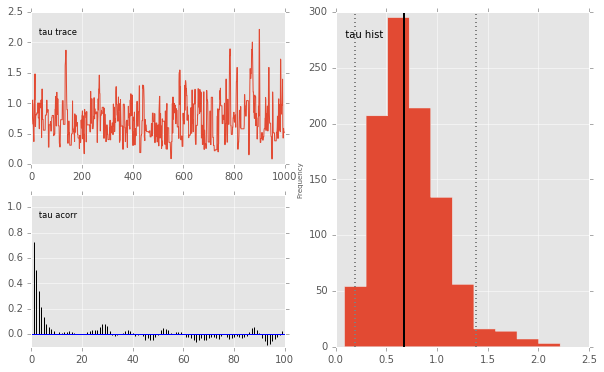

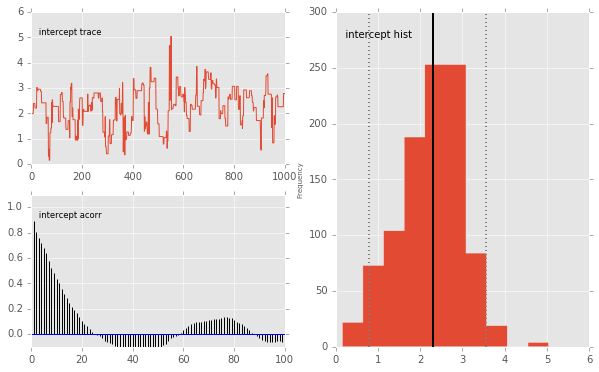

In [7]:
pymc2.Matplot.plot(mc)

TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
pymc2.MvNormal()

Generating histogram of intercept
Generating histogram of slope
Generating histogram of tau


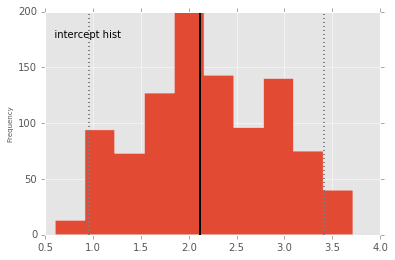

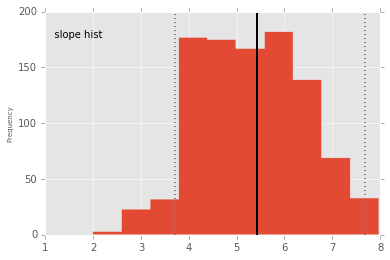

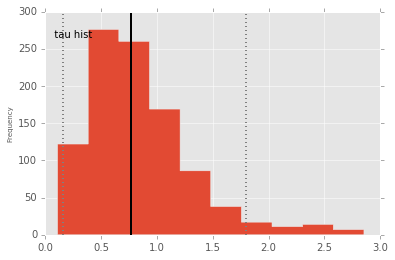

In [12]:
pymc2.Matplot.histogram(mc)

In [18]:
np.nan(2)

TypeError: 'float' object is not callable

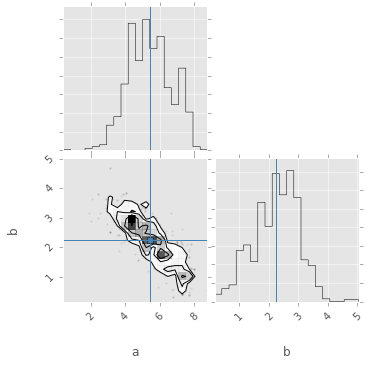

In [19]:
samples = np.array([a.trace(), b.trace()]).T
#samples = samples[0]
import corner as triangle_plot
tmp = triangle_plot.corner(samples[:, :], labels=['a', 'b'],
                      truths=[a.stats()['mean'], b.stats()['mean']])

In [13]:
a.trace()

array([ 5.4153,  5.368 ,  5.368 ,  6.5034,  5.2905,  5.2905,  5.2905,
        5.1935,  5.1935,  5.1935,  5.1935,  5.1935,  5.1935,  5.1935,
        5.1935,  5.1935,  5.1935,  5.1935,  5.1935,  6.2906,  4.6143,
        4.6143,  4.6143,  4.6143,  4.6143,  3.7799,  3.7799,  3.7799,
        3.7799,  3.7799,  3.7799,  3.7799,  4.551 ,  4.551 ,  4.551 ,
        4.551 ,  4.551 ,  4.6839,  4.6839,  4.6839,  4.6839,  4.6839,
        4.6839,  4.6839,  4.6839,  4.6839,  4.6839,  4.6839,  4.6839,
        3.5512,  3.6664,  3.6664,  4.8667,  4.8667,  4.8667,  4.8667,
        4.8667,  4.8667,  4.8667,  6.4237,  6.4237,  6.4237,  6.4237,
        6.4237,  6.4237,  6.3305,  6.3305,  6.3305,  6.7798,  6.7798,
        6.7798,  6.7798,  6.7798,  7.4153,  7.4153,  7.4153,  7.4153,
        7.4153,  7.4153,  7.4153,  7.4153,  6.6927,  6.6927,  6.6927,
        6.3696,  6.3696,  6.3696,  5.2749,  5.2749,  5.5739,  5.5739,
        5.5644,  5.5644,  5.5644,  5.5644,  5.5644,  5.5644,  5.5644,
        5.5644,  5.0

In [20]:
b.trace().shape


(1000,)

In [ ]:
pymc2.Matplot.acorr()

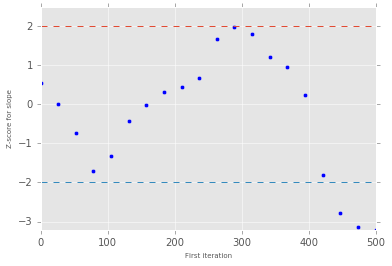

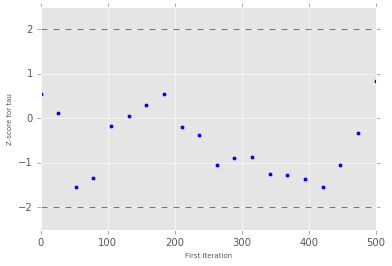

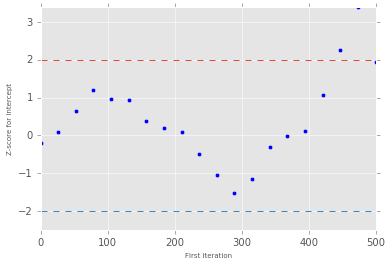

In [22]:
#Check for convergence. See http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3097064/
scores = pymc2.geweke(mc, intervals=20)
pymc2.Matplot.geweke_plot(scores)

In [26]:
pymc2.Matplot.histogram(mc)

AttributeError: 'MCMC' object has no attribute 'original_varnames'

In [14]:

from scipy.stats import gaussian_kde
density = gaussian_kde(a.trace())

Generating histogram of slope


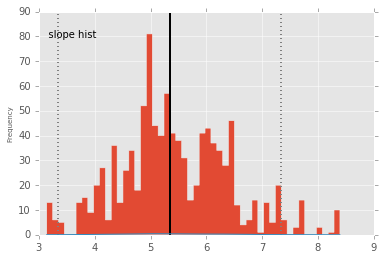

In [20]:
pymc2.Matplot.histogram(a,bins=50)
plt.plot(np.unique(a.trace()),density(np.unique(a.trace())))

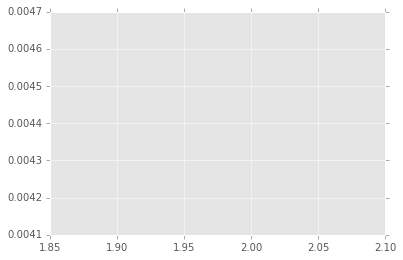

In [33]:
plt.plot(np.linspace(np.min(a.trace()),np.min(a.trace()),100),density(np.linspace(np.min(a.trace()),np.min(a.trace()),100)))
plt.show()

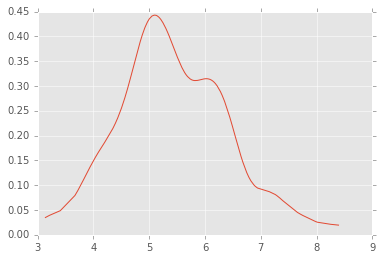

In [18]:
xs = np.linspace(np.min(a.trace()),np.max(a.trace()),200)
plt.plot(np.unique(a.trace()),density(np.unique(a.trace())))

In [ ]:
pymc2.MvNormal

In [1]:

from scipy.stats import multivariate_normal

In [ ]:
multivariate_normal.logpdf

In [ ]:
pymc2.mv_normal_like

In [ ]:
mc.use_step_method()

In [ ]:
mc.sample()